<a href="https://colab.research.google.com/github/dagomezb/ML-en-Salud/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Means**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Wholesale customers data.csv")

In [3]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
data.shape

(440, 8)

In [6]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [9]:
indices = [26,176,392]

In [12]:
muestras = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
muestras

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,9898,961,2861,3151,242,833
1,1,3,45640,6958,6536,7368,1532,230
2,1,3,518,4180,3600,659,122,654


In [13]:
data = data.drop(indices, axis = 0)

In [15]:
#procesamiento de los datos

data = data.drop(['Region', 'Channel'], axis = 1)
muestras = muestras.drop(['Region', 'Channel'], axis = 1)

In [16]:
from sklearn import preprocessing

data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [17]:
from sklearn.cluster import KMeans

X = data_escalada.copy()


In [18]:
inercia = []
for i in range(1,20):
  algoritmo = KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10)
  algoritmo.fit(X)
  #Para cada K se calcula la suma total del cuadrado dentro del clúster
  inercia.append(algoritmo.inertia_)

**Ejercicio**

Visualizar la gráfica de codo para seleccionar el valor de K

In [19]:
algoritmo = KMeans(n_clusters= 6, init='k-means++', max_iter=300, n_init=10)

In [20]:
algoritmo.fit(X)

KMeans(n_clusters=6)

In [21]:
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [22]:
centroides

array([[0.72803648, 0.33072405, 0.48711474, 0.09527502, 0.1653676 ,
        0.10417967],
       [0.17739662, 0.41830554, 0.77669715, 0.07484819, 0.32793034,
        0.07008281],
       [0.95712216, 0.12012842, 0.16127343, 0.11997754, 0.02901598,
        0.05842406],
       [0.81285772, 0.20380729, 0.2045692 , 0.44864104, 0.03739865,
        0.08314326],
       [0.29920311, 0.70542955, 0.46159932, 0.17050098, 0.12347023,
        0.191545  ],
       [0.42303472, 0.18455606, 0.34478159, 0.75343783, 0.05350116,
        0.08201898]])

In [23]:
etiquetas

array([0, 4, 4, 3, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 1, 4, 0, 0, 2, 3,
       2, 4, 0, 0, 2, 1, 2, 0, 4, 2, 2, 4, 1, 2, 0, 1, 2, 3, 2, 1, 1, 0,
       4, 1, 4, 0, 1, 3, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 1, 3, 1, 1,
       0, 4, 2, 3, 0, 5, 3, 0, 2, 5, 1, 2, 4, 2, 1, 0, 2, 0, 1, 4, 2, 5,
       2, 2, 3, 1, 5, 4, 1, 1, 5, 5, 3, 0, 1, 1, 2, 2, 2, 1, 1, 4, 1, 2,
       1, 3, 2, 2, 2, 2, 0, 2, 3, 2, 3, 2, 0, 2, 2, 3, 0, 4, 2, 3, 2, 2,
       2, 2, 2, 4, 4, 0, 0, 2, 2, 2, 3, 2, 1, 2, 2, 3, 2, 2, 4, 2, 4, 2,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 4, 2, 3, 1, 4, 1, 1, 1, 1, 0,
       0, 4, 0, 2, 1, 4, 1, 3, 5, 1, 1, 1, 3, 2, 2, 1, 2, 3, 3, 1, 0, 2,
       1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 3, 2, 1,
       5, 5, 2, 2, 0, 3, 0, 3, 3, 4, 2, 4, 2, 4, 2, 2, 2, 2, 3, 2, 2, 0,
       1, 1, 2, 2, 2, 3, 3, 1, 5, 0, 4, 2, 0, 3, 2, 2, 0, 3, 2, 1, 1, 4,
       1, 2, 1, 2, 5, 4, 4, 2, 4, 4, 2, 5, 3, 0, 0, 0, 2, 3, 2, 2, 2, 3,
       2, 2, 0, 0, 5, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1,

In [24]:
muestra_prediccion = algoritmo.predict(muestras_escalada)

In [25]:
for i,pred in enumerate(muestra_prediccion):
  print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 2
Muestra 1 se encuentra en el clúster: 2
Muestra 2 se encuentra en el clúster: 4


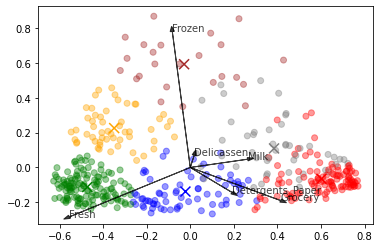

In [27]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA

modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 

#Se aplica la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown']

#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

#Se grafican los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)

#Se guardan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns

#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)

plt.show()